In [47]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.playback import play

In [48]:
sample_rate = 44100
f = 440
t = 3

In [49]:
def sine(x):
    return np.sin(x)

def sawtooth(x):
    return (x + np.pi) / np.pi % 2 -1

In [50]:
waveform = sawtooth

In [51]:
wavetable_length = 64
wavetable = np.zeros(wavetable_length)

In [52]:
for i in range(wavetable_length):
    wavetable[i] = waveform(2 * np.pi * i/wavetable_length)

In [53]:
output = np.zeros(t * sample_rate)

In [54]:
index_in_wavetable = 0
index_increment = f * wavetable_length / sample_rate

In [55]:
def interpolate_linearly(wavetable, index_in_wavetable):
    lower_index = int(np.floor(index_in_wavetable))
    upper_index = (lower_index + 1) % len(wavetable) 
    
    upper_index_weight = index_in_wavetable - lower_index
    lower_index_weight = 1 - upper_index_weight
    
    return wavetable[lower_index] * lower_index_weight + wavetable[upper_index] * upper_index_weight

In [56]:
for i in range(len(output)):
    output[i] = interpolate_linearly(wavetable, index_in_wavetable)
    index_in_wavetable = (index_in_wavetable + index_increment) % wavetable_length

In [57]:
gain = -20
amplitude = 10 ** (gain/20)

In [58]:
output *= amplitude

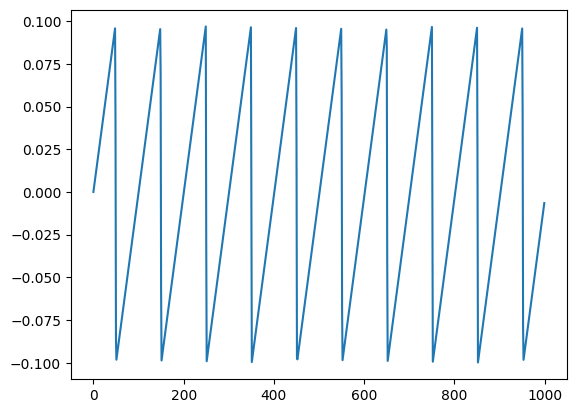

In [59]:
plt.plot(output[:1000])

In [60]:
wavfile.write("sine440interp.wav", sample_rate, output.astype(np.float32))

In [61]:
import sounddevice as sd
sd.play(output, 44100)

ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
